In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader
from my_snn.utils import train, training_plots
import torch
device = "cuda:0"

time_window = 500
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

In [ ]:
surr='step'

name=f'add{time_window}_d_d_128_{surr}'

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 0.3328
training custom_2_1_12850_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.60086
Time elasped: 0.11699771881103516
Epoch [2/5000]
Step [1/1], Loss: 0.27761
Time elasped: 0.11999869346618652
Epoch [3/5000]
Step [1/1], Loss: 0.45642
Time elasped: 0.11500048637390137
Epoch [4/5000]
Step [1/1], Loss: 0.23107
Time elasped: 0.11417412757873535
Epoch [5/5000]
Step [1/1], Loss: 0.17818
Time elasped: 0.11700010299682617
Test set accuracy: 5.46875% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.28985
Time elasped: 0.11300253868103027
Epoch [7/5000]
Step [1/1], Loss: 0.28277
Time elasped: 0.11499691009521484
Epoch [8/5000]
Step [1/1], Loss: 0.24124
Time elasped: 0.11200094223022461
Epoch [9/5000]
Step [1/1], Loss: 0.18742
Time elasped: 0.11299967765808105
Epoch [10/5000]
Step [1/1], Loss: 0.19108
Time elasped: 0.11500048637390137
Test set accuracy: 5.46875% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.23928
Time elasped: 0.11797118186950684
Epoch [12/5000]
Step [1/1], Loss: 0.21178
Time elasped: 0.11300086975097656


delays: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 3.328
training custom_2_1_128500_RSNN_d_d_1l128_500d10.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.84926
Time elasped: 2.1000008583068848
Epoch [2/5000]
Step [1/1], Loss: 0.97151
Time elasped: 2.102001667022705
Epoch [3/5000]
Step [1/1], Loss: 0.17310
Time elasped: 2.0970916748046875
Epoch [4/5000]
Step [1/1], Loss: 0.44660
Time elasped: 2.0909993648529053
Epoch [5/5000]
Step [1/1], Loss: 0.39920
Time elasped: 2.103036642074585
Test set accuracy: 10.15625% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.21068
Time elasped: 2.097968339920044
Epoch [7/5000]
Step [1/1], Loss: 0.22301
Time elasped: 2.1299996376037598
Epoch [8/5000]
Step [1/1], Loss: 0.25735
Time elasped: 2.1009998321533203
Epoch [9/5000]
Step [1/1], Loss: 0.21218
Time elasped: 2.0970005989074707
Epoch [10/5000]
Step [1/1], Loss: 0.22521
Time elasped: 2.0932278633117676
Test set accuracy: 9.375% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.18146
Time elasped: 2.0969717502593994
Epoch [12/5000]
Step [1/1], Loss: 0.19593
Time elasped: 2.0969533920288086
Epoch [13/5000]


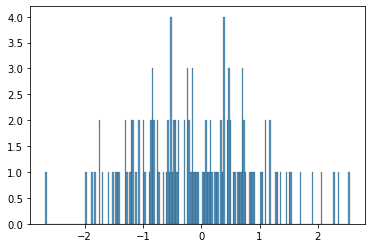

In [5]:
surr='fs'

name=f'add{time_window}_d_d_128_{surr}'

delay = (time_window, int(time_window/50))

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay = delay, thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

In [ ]:
surr='mg'

name= f'add{time_window}_d_d_128_{surr}'

hidden = (128, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)